In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor

In [3]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League','Division','NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary','League','Division','NewLeague'], axis = 1).astype("float64")
X = pd.concat([X_,dms[['League_N','Division_W','NewLeague_N']]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [2]:
gbm_model = GradientBoostingRegressor()

In [4]:
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [8]:
#TAHMİN

In [6]:
y_pred = gbm_model.predict(X_test)

In [7]:
np.sqrt(mean_squared_error(y_test, y_pred))

350.7437926217741

In [9]:
#TUNING

In [10]:
gbm_params = {
    'learning_rate':[0.001,0.01,0.1,0.2],
    'max_depth':[3,5,8,50,100],
    'n_estimators':[200,500,1000,2000],
    'subsample':[1,0.5,0.75]
}

In [11]:
gbm_model = GradientBoostingRegressor()

In [12]:
gbm_cv_model = GridSearchCV(gbm_model, gbm_params, cv = 10, n_jobs = -1, verbose = 2)
gbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed: 11.7min finished


GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 8, 50, 100],
                         'n_estimators': [200, 500, 1000, 2000],
                         'subsample': [1, 0.5, 0.75]},
             verbose=2)

In [14]:
gbm_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 1000, 'subsample': 0.5}

In [17]:
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.1, max_depth =  8, n_estimators = 1000, subsample = 0.5)
gbm_tuned.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=8, n_estimators=1000, subsample=0.5)

In [19]:
y_pred = gbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

334.35901740879115

Text(0.5, 0, 'Değişken önem düzeyi')

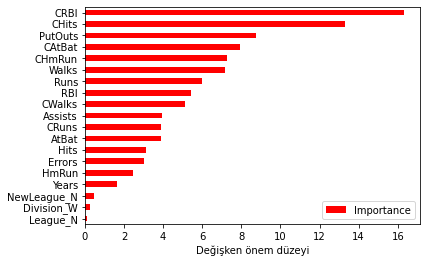

In [20]:
Importance = pd.DataFrame({'Importance': gbm_tuned.feature_importances_*100},index = X_train.columns)
Importance.sort_values(by = "Importance", axis = 0, ascending = True).plot(kind = 'barh', color = 'r')
plt.xlabel('Değişken önem düzeyi')